# DNN指令介紹 ft.keras

## 常用套件

*   keras

> 深度學習常用套件

```
from tensorflow import keras
```
*   skleran

> 機器學習常用套件，在本節中不會詳細介紹

```
import sklearn
```


*   本節重要套件



```
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pandas import crosstab
```




## 模型建構

  - 模型初始化

```
Sequential()
```
  - 增加輸入、隱藏、輸出層


```
Dense(units,input_dim, activation, kernel_initializer)
```
   
|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|units|該層神經元數，也就是輸出維度|正整數|必填，沒填會噴Error|
|input_dim|輸入的維度(=features總數)，通常只有輸入層需要設置|正整數|輸入層必填|
|activation|活化函數|softmax、elu、selu、relu、tanh、sigmoid、linear(其餘函數請參考附件)|linear|
|kernel_initializer|權重初始化方法|zeros、ones、(random、he、lecun、glorot)_(normal、uniform)|glorot_uniform|

- early stopping層

```
EarlyStopping(
    monitor,
    min_delta,
    patience,
    verbose,
    mode
)
```

|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|monitor|要監控的參數(通常為history中的數值)|string|val_loss|
|min_delta|最小可容忍的誤差(誤差內則記為沒有improvement)|int|0|
|patience|設定多少epoch後沒有更好就停止|int|0|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條，2 -> 簡約顯示|1|
|mode|監控模式(auto、min、max)|string|auto|


  - 編譯


```
compile(optimizer, loss, metrics)
```

|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|optimizer|優化器|SGD、Adam|必填，沒填會噴Error|
|loss|損失函數|(binary、categorical)_crossentropy、mean_(squared、absolute)_error、huber_loss|None|
|metrics|評估方式|accuracy、loss|None|

 - 執行



```
fit(x, y, batch_size, epochs, verbose, validation_split,validation_data,callbacks)
```

|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|x|訓練x|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|y|訓練y|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|batch_size|批量大小|正整數|32|
|epochs|迭代數|正整數|1|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條，2 -> 簡約顯示|1|
|validation_split|訓練資料作為驗證資料的比例|0 - 1的浮點數|0.0|
|validation_data|驗證資料|(vaild_x,vaild_y)|None|
|callbacks|用於earlystop|string|None|



> 會回傳history，紀錄train、test的loss與評估值和epoch的關係









## 評估模型

 - 評估



```
evaluate(x, y, batch_size, verbose)
```


|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|x|訓練x|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|y|訓練y|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|batch_size|批量大小|正整數|32|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條|1|

> 會回傳loss和評估指標(若沒有設置評估指標，則回傳loss)

- 預測數值



```
predict(x, batch_size, verbose)
```


|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|x|測試x|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|batch_size|批量大小|正整數|32|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條|1|

> 會回傳預測的數值

- 預測類別



```
predict_classes(x, batch_size, verbose)
```


|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|x|測試x|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|batch_size|批量大小|正整數|32|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條|1|

> 會回傳預測類別的label值

- 預測機率



```
predict_proba(x, batch_size, verbose)
```


|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|x|測試x|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|batch_size|批量大小|正整數|32|
|verbose|訓練過程顯示狀況|0 -> 不顯示，1 -> 顯示進度條|1|

> 會回傳預測類別的機率

 - confusion matrix



```
crosstab(target,predict,rownames,colnames)
```
|變數|含意|可輸入的值|預設值|
|-|-|-|-|
|target|實際值|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|predict|預測值|array、ndarray、dataframe、Series|必填，沒填會噴Error|
|rownames|列的title|字串|None|
|colnames|欄的title|字串|None|



---

參考來源：[keras document](https://keras.io/zh/)

其他內容請參考EDA的notebook


# 實例演練



> 這邊直接使用openml提供的信用風險資料集，詳情請見：
[openml_credit-g](https://www.openml.org/d/31)



## 套件與資料集引入

In [2]:
#引入keras
from tensorflow import keras
#以下為做DNN常引入的重要模組
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
#引入openml
from sklearn.datasets import fetch_openml

#其他常用套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 引入資料集
credit = fetch_openml('credit-g',version=1)
features,targets = credit['data'],credit['target']

In [4]:
#查看data基本描述
descr = credit['DESCR']
print(descr)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit data**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
      Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Pe

In [5]:
#查看原始資料
print("targets:")
print(targets[:10])
print("---------")
print("features:")
print(features[:10])

targets:
['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad']
---------
features:
[[0.000e+00 6.000e+00 4.000e+00 3.000e+00 1.169e+03 4.000e+00 4.000e+00
  4.000e+00 2.000e+00 0.000e+00 4.000e+00 0.000e+00 6.700e+01 2.000e+00
  1.000e+00 2.000e+00 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 4.800e+01 2.000e+00 3.000e+00 5.951e+03 0.000e+00 2.000e+00
  2.000e+00 1.000e+00 0.000e+00 2.000e+00 0.000e+00 2.200e+01 2.000e+00
  1.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 1.200e+01 4.000e+00 6.000e+00 2.096e+03 0.000e+00 3.000e+00
  2.000e+00 2.000e+00 0.000e+00 3.000e+00 0.000e+00 4.900e+01 2.000e+00
  1.000e+00 1.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 4.200e+01 2.000e+00 2.000e+00 7.882e+03 0.000e+00 3.000e+00
  2.000e+00 2.000e+00 2.000e+00 4.000e+00 1.000e+00 4.500e+01 2.000e+00
  2.000e+00 1.000e+00 2.000e+00 2.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.400e+01 3.000e+00 0.000e+00 4.870e+03 0.000e+00 2.000e+00
  

## 資料前處理

In [6]:
#引入套件 進行 label encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
#實作label encoding
le = LabelEncoder()
targets = le.fit_transform(targets)
print(targets[:10])

[1 0 1 1 0 1 1 1 1 0]


In [8]:
#建立資料的dataframe(方便查看)
data_df = pd.DataFrame(
    data = features,
    columns = ["Status of existing checking account","Duration in months","Credit history","Purpose of the credit","Credit amount","Status of savings account/bonds","Present employment","Installment rate in percentage of disposable income","Personal status and sex","Other debtors / guarantors","Present residence since X years","Property","Age in years","Other installment plans","Housing","Number of existing credits at this bank","Job","Number of people being liable to provide maintenance for","Telephone","Foreign worker"]
)
data_df.insert(0,"good or bad credit risks",targets)

In [9]:
#查看資料前5筆資料
print("前5筆資料")
data_df.head(5)

前5筆資料


,good or bad credit risks,Status of existing checking account,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since X years,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker
0,1,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,0,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,1,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,1,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [10]:
#資料的形狀
print("rows:{}\ncolumns:{}".format(data_df.shape[0],data_df.shape[1]))

rows:1000
columns:21


In [11]:
#資料的資本資訊
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   good or bad credit risks                                  1000 non-null   int64  
 1   Status of existing checking account                       1000 non-null   float64
 2   Duration in months                                        1000 non-null   float64
 3   Credit history                                            1000 non-null   float64
 4   Purpose of the credit                                     1000 non-null   float64
 5   Credit amount                                             1000 non-null   float64
 6   Status of savings account/bonds                           1000 non-null   float64
 7   Present employment                                        1000 non-null   float64
 8   Installment rate in

In [12]:
#分割測試、訓練資料
train_x,test_x,train_y,test_y = train_test_split(
    features,      #放特徵
    targets,      #放目標
    test_size = 0.3  #測試資料占3成
    )

## 資料視覺化


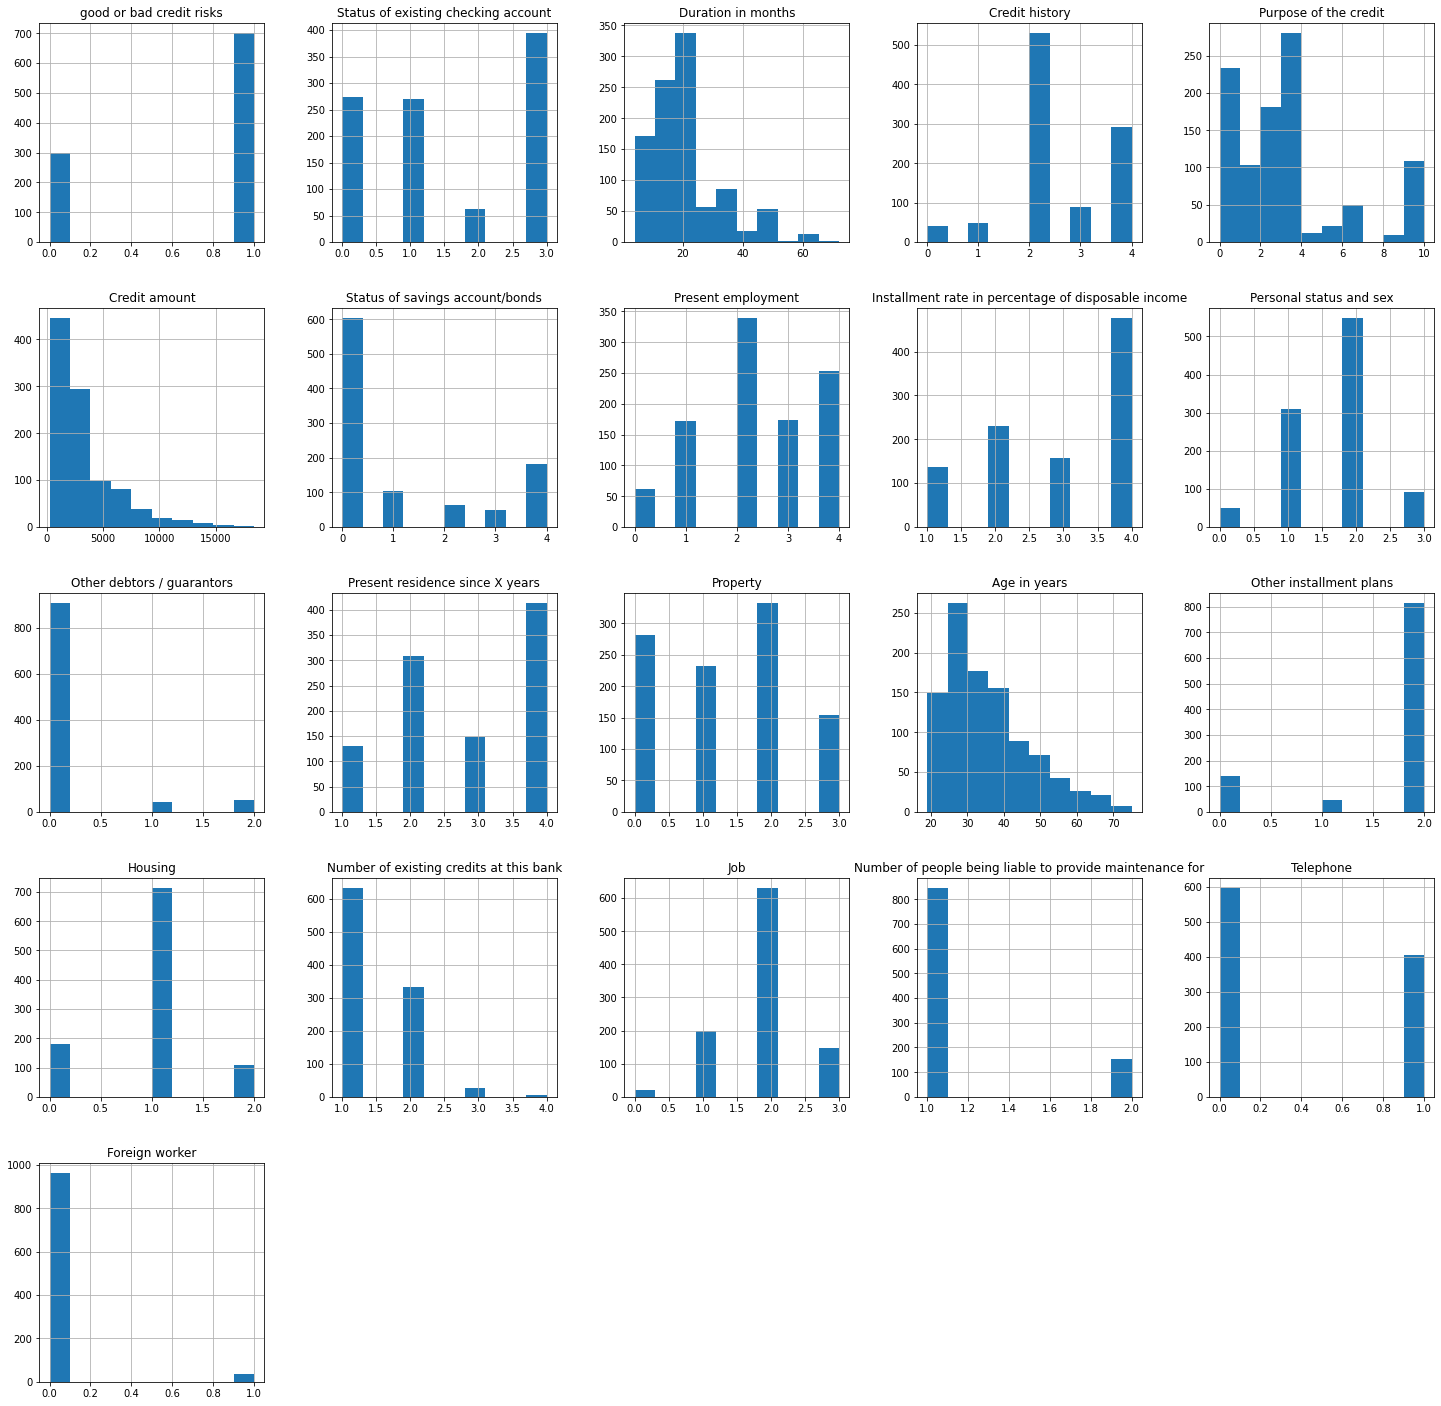

In [13]:
#資料視覺化
hist = data_df.hist(figsize=(25,25))

In [14]:
# 用來畫heatmap的進階畫圖套件
import seaborn as sns 

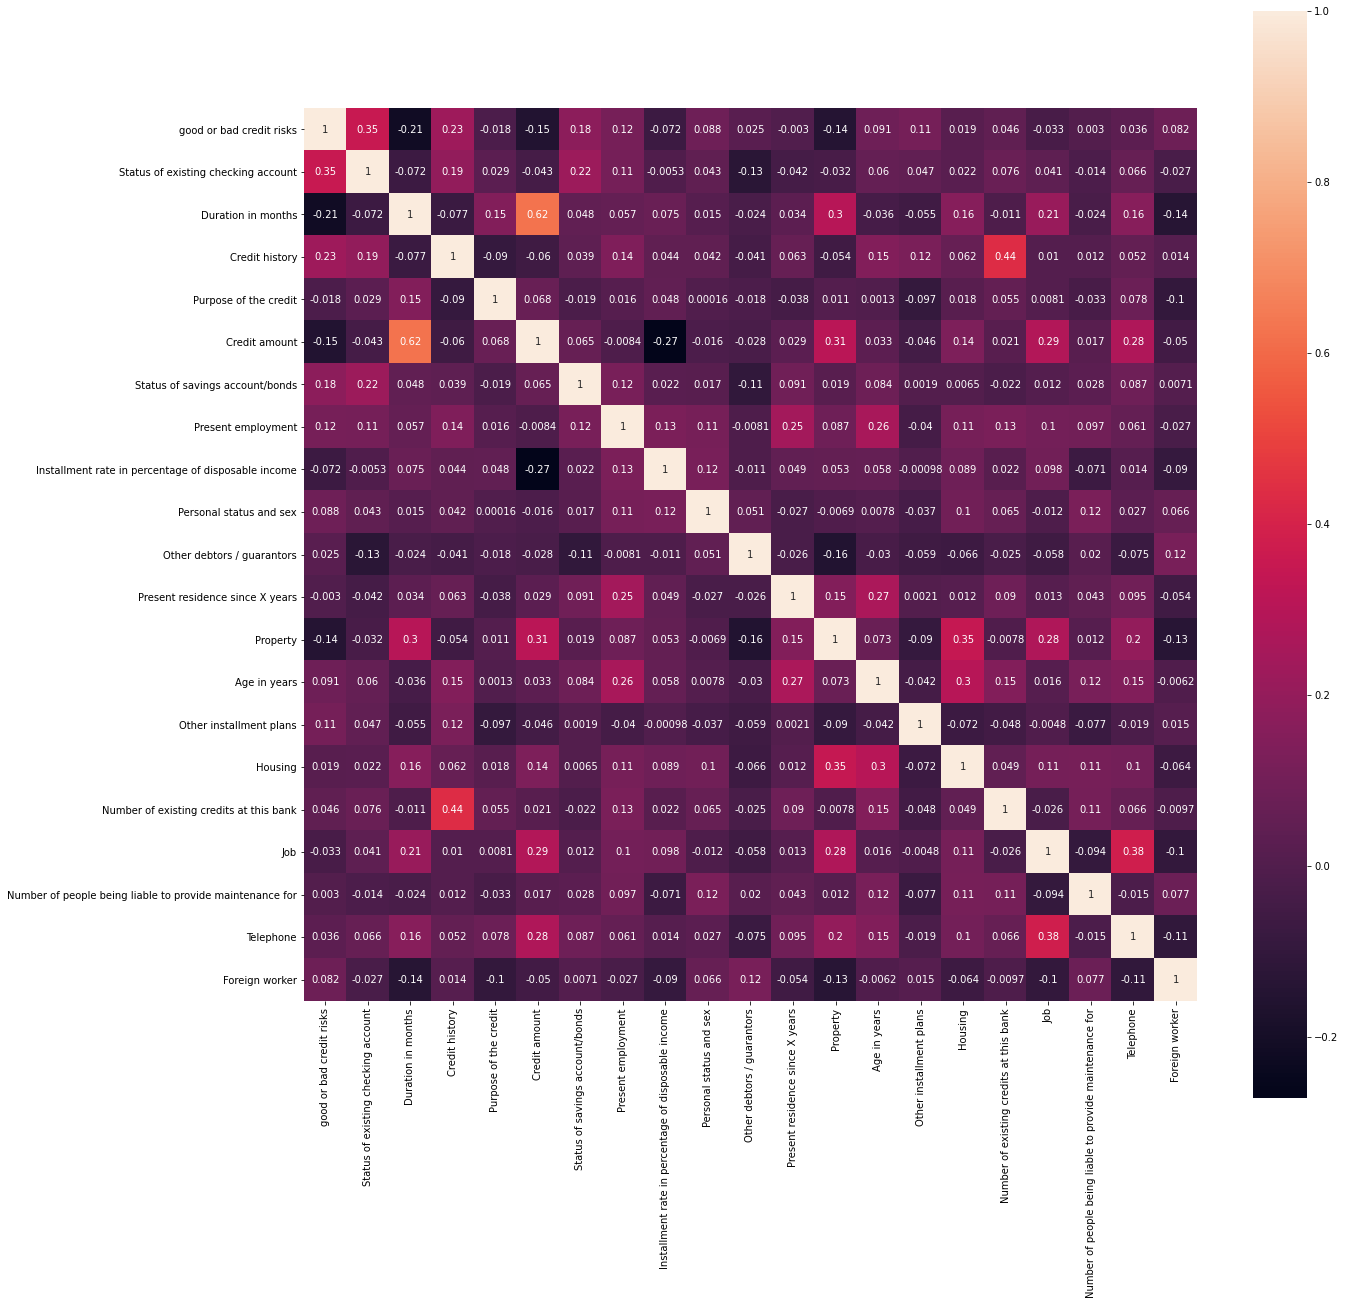

In [15]:
#設定圖形大小
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(data_df.corr(),         #放入data                 
            annot=True,       #是否要在格子內寫入數字               
            square=True,      #格子是否要是正方形
            xticklabels=True,    #是否顯示x標籤     
            yticklabels=True,    #是否顯示y標籤
            ax=ax          #設定圖形座標軸
      )              
plt.show()   

In [16]:
!pip install missingno

In [17]:
import missingno as msno

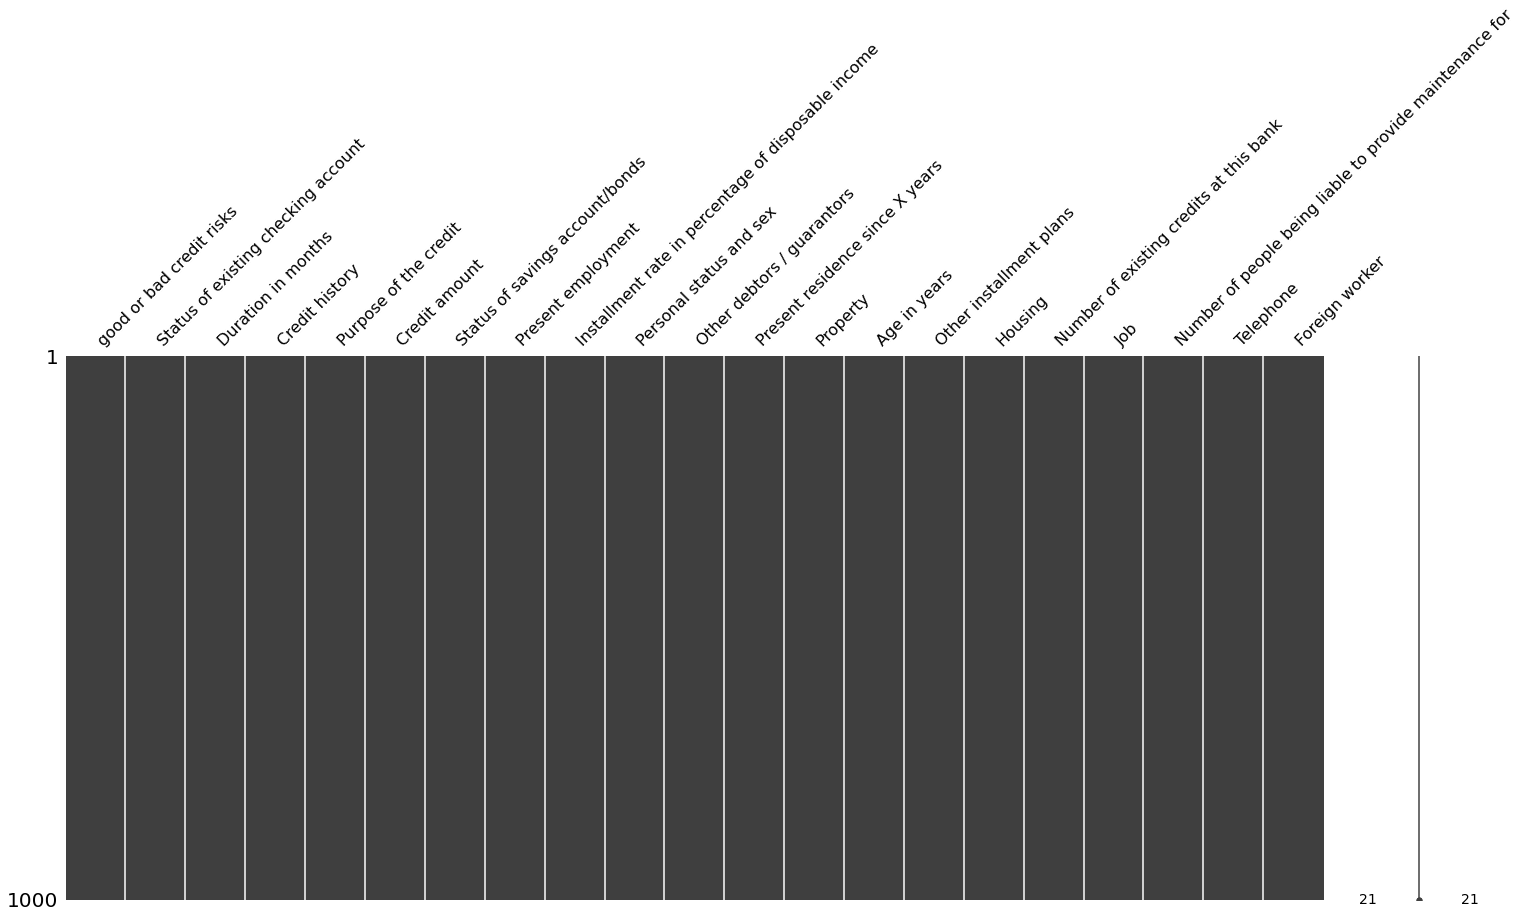

In [18]:
#缺失值檢查(有空白處表示有缺失值)
miss_plt = msno.matrix(data_df)

## 模型建構與執行

In [19]:
#模型初始化
model = Sequential()
#模型建構
model.add(Dense(100,activation="relu",input_dim=20))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [20]:
#模型編譯
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [21]:
#模型架構
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Early stop
early_stopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.01,
    patience = 300,
    verbose = 1,
    mode = "max"
)

In [23]:
#模型執行
history = model.fit(train_x,train_y,    #輸入與輸出
          epochs = 10000,      #迭代數
          verbose = 1,      #顯示訓練過程
          validation_split = 0.2, #驗證資料分割比例
          callbacks = [early_stopping]
                    )

Epoch 1/10000
18/18 [==============================] - 0s 10ms/step - loss: 34.1124 - accuracy: 0.5339 - val_loss: 18.6912 - val_accuracy: 0.6571
Epoch 2/10000
18/18 [==============================] - 0s 3ms/step - loss: 8.0019 - accuracy: 0.5661 - val_loss: 0.8584 - val_accuracy: 0.6571
Epoch 3/10000
18/18 [==============================] - 0s 3ms/step - loss: 4.3381 - accuracy: 0.5571 - val_loss: 14.7646 - val_accuracy: 0.6571
Epoch 4/10000
18/18 [==============================] - 0s 3ms/step - loss: 4.0828 - accuracy: 0.6018 - val_loss: 5.3771 - val_accuracy: 0.6571
Epoch 5/10000
18/18 [==============================] - 0s 3ms/step - loss: 6.4450 - accuracy: 0.5768 - val_loss: 1.0682 - val_accuracy: 0.6571
Epoch 6/10000
18/18 [==============================] - 0s 3ms/step - loss: 6.8388 - accuracy: 0.5286 - val_loss: 2.5484 - val_accuracy: 0.3500
Epoch 7/10000
18/18 [==============================] - 0s 3ms/step - loss: 2.4407 - accuracy: 0.5893 - val_loss: 4.0184 - val_accuracy: 0.

## 結果與評估

In [24]:
#結果評估
train_result = model.evaluate(train_x,train_y)
test_result = model.evaluate(test_x,test_y)
print("-----------")
print("train loss:{},train acc:{}".format(train_result[0],train_result[1]))
print("test loss:{},test acc:{}".format(test_result[0],test_result[1]))

10/10 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7167
-----------
train loss:0.5916094183921814,train acc:0.6928571462631226
test loss:0.5666799545288086,test acc:0.7166666388511658


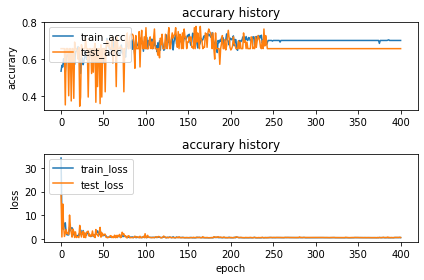

In [25]:
# 訓練過程圖 純粹畫圖用
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("accurary")
plt.title("accurary history")
plt.legend(['train_acc','test_acc'],loc='upper left')

plt.subplot(212)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss', 'test_loss'],loc='upper left')
plt.xlabel("epoch")

plt.tight_layout()
plt.show()

In [26]:
#模型預測
predict_y = model.predict(test_x)
predict_class_y = []
for proba in predict_y:
  if(proba > 0.7): #閾值
    predict_class_y.append(1)
  else:
    predict_class_y.append(0)
predict_class_y = np.array(predict_class_y).reshape(-1)

In [27]:
#confusion matrix
confusion = pd.crosstab(test_y,predict_class_y,rownames=['true'],colnames=['predict'])
confusion

predict,0,1
true,,
0,82,3
1,158,57


In [28]:
#模型預測
y_score = model.predict(test_x)

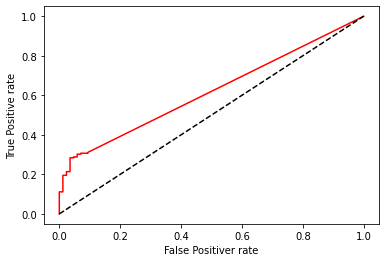

roc auc score:0.6177291381668948


In [29]:
#引入套件
from sklearn.metrics import roc_curve,roc_auc_score
#roc curve
fpr,tpr,thresholds = roc_curve(test_y,y_score)
plt.plot(fpr,tpr,'r-')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positiver rate')
plt.ylabel('True Positive rate')
plt.show()
#auc score
print("roc auc score:"+str(roc_auc_score(test_y,y_score)))

## Cross Validation


In [30]:
from sklearn.model_selection import KFold 

In [44]:
kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=2020,
           shuffle=True)
kf.get_n_splits(train_x)  
train_acc_list = []    
count = 1                          # 給予資料範圍

In [45]:
for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index] 

    model.fit(train_x,train_y,    #輸入與輸出
          epochs = 10000,      #迭代數
          verbose = 0,      #顯示訓練過程
          validation_data = (valid_x_split, valid_y_split), #驗證資料
          callbacks = [early_stopping])
    train_acc = model.evaluate(train_x_split,train_y_split)
    train_acc_list.append(train_acc[1])
    print("{}/5".format(count))
    count += 1 
print(('average train accuracy: {}').format(np.mean(train_acc_list)# 輸出平均訓練準確度                            
))

Epoch 00301: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.6893
1/5
Epoch 00720: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7464
2/5
Epoch 00304: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7714
3/5
Epoch 00553: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7982
4/5
Epoch 00463: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.7982
5/5
average train accuracy: 0.7607142686843872


## 網格搜尋法

In [96]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
epochs = [50, 100]
optimizers = ['sgd', 'adam']

In [107]:
param_grid = dict(optimizer=optimizers, epochs=epochs)

In [108]:
param_grid

{'epochs': [50, 100], 'optimizer': ['sgd', 'adam']}

In [109]:
def create_model(optimizer='adam'):
  model = Sequential()
  #模型建構
  model.add(Dense(100,activation="relu",input_dim=20))
  model.add(Dense(100,activation="relu"))
  model.add(Dense(100,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))      
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
  return model

In [110]:
model_estimor = KerasClassifier(build_fn=create_model,verbose = 0)

In [111]:
grid = GridSearchCV(estimator=model_estimor, param_grid=param_grid, n_jobs=-1)

In [131]:
grid_result = grid.fit(train_x, train_y)


In [132]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for index in range(len(grid_result.cv_results_['mean_test_score'])): 
  print("%f (%f) with: %r" % (grid_result.cv_results_['mean_test_score'][index], grid_result.cv_results_['std_test_score'][index], grid_result.cv_results_['params'][index]))

Best: 0.707143 using {'epochs': 50, 'optimizer': 'adam'}
0.692857 (0.046730) with: {'epochs': 50, 'optimizer': 'sgd'}
0.707143 (0.044493) with: {'epochs': 50, 'optimizer': 'adam'}
0.690000 (0.049611) with: {'epochs': 100, 'optimizer': 'sgd'}
0.648571 (0.059659) with: {'epochs': 100, 'optimizer': 'adam'}
